In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import warnings
import missingno
import datetime 

from scipy.stats.mstats import winsorize 
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

# New package installed with this learning module 20191118
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
kagle = dict(
    drivername="postgresql", 
    username="dsbc_student", 
    password="7*.8G9QH21", 
    host="142.93.121.174", 
    port="5432", 
    database="youtube"
)

engine = create_engine(URL(**kagle), echo=True)

youtube_df = pd.read_sql_query("SELECT * FROM youtube", con=engine)

engine.dispose()

2019-11-20 14:29:41,638 INFO sqlalchemy.engine.base.Engine select version()
2019-11-20 14:29:41,642 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:29:41,745 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-20 14:29:41,746 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:29:41,844 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-20 14:29:41,846 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:29:41,896 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-20 14:29:41,897 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:29:41,955 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-20 14:29:41,957 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:29:42,056 INFO sqlalchemy.engine.base.Engine SELECT * FROM youtube
2019-11-20 14:29:42,057 INFO sqlalchemy.engine.base.Engine {}


In [3]:
# Make sure that the Video Uploads and Subscribers variables are coming in as objects
youtube_df[["Video Uploads", "Subscribers"]] = youtube_df[["Video Uploads", "Subscribers"]].astype(dtype="object")

# Deal with the missing values
youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df["Grade"] = youtube_df["Grade"].apply(str.strip).replace("", np.nan)

youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

youtube_df["winsorized_uploads"] = winsorized_uploads = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorized_suscribers = winsorize(youtube_df["Subscribers"], (0, 0.10))
youtube_df["winsorized_views"] = winsorized_views = winsorize(youtube_df["Video Uploads"], (0, 0.10))

for i in range(0, len(youtube_df["Grade"])): 
    if pd.isnull(youtube_df["Grade"][i]):
        youtube_df["Grade"][i] = youtube_df["Grade"][i-1]

In [4]:
# Begin the data exploration
youtube_df.describe()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
count,5000.000000,5000.00,5.000000e+03,5000.000000,5000.00,5000.000000
mean,3859.466797,2620021.50,1.071449e+09,1288.413818,2081598.25,1288.413818
std,17075.607422,3771402.25,2.003844e+09,1779.179321,1781480.25,1779.179321
min,1.000000,301.00,7.500000e+01,1.000000,301.00,1.000000
25%,141.000000,666802.50,1.862329e+08,141.000000,666802.50,141.000000
50%,445.000000,1544402.00,4.820548e+08,445.000000,1544402.00,445.000000
75%,1511.500000,2723181.50,1.124368e+09,1511.500000,2723181.50,1511.500000
max,422326.000000,65995312.00,4.754884e+10,5653.000000,5895361.00,5653.000000


In [5]:
# Descriptive statistics for text-based variables
youtube_df.describe(include=["O"])

,Rank,Grade,Channel name
count,5000,5000,5000
unique,5000,5,4993
top,"4,040th",B+,Super Kids
freq,1,2960,2


In [6]:
# Descriptive statistics for all variables
youtube_df.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
count,5000,5000,5000,5000.000000,5000.00,5.000000e+03,5000.000000,5000.00,5000.000000
unique,5000,5,4993,NaN,NaN,NaN,NaN,NaN,NaN
top,"4,040th",B+,Super Kids,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2960,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3859.466797,2620021.50,1.071449e+09,1288.413818,2081598.25,1288.413818
std,NaN,NaN,NaN,17075.607422,3771402.25,2.003844e+09,1779.179321,1781480.25,1779.179321
min,NaN,NaN,NaN,1.000000,301.00,7.500000e+01,1.000000,301.00,1.000000
25%,NaN,NaN,NaN,141.000000,666802.50,1.862329e+08,141.000000,666802.50,141.000000
50%,NaN,NaN,NaN,445.000000,1544402.00,4.820548e+08,445.000000,1544402.00,445.000000
75%,NaN,NaN,NaN,1511.500000,2723181.50,1.124368e+09,1511.500000,2723181.50,1511.500000


### Univariate visualization

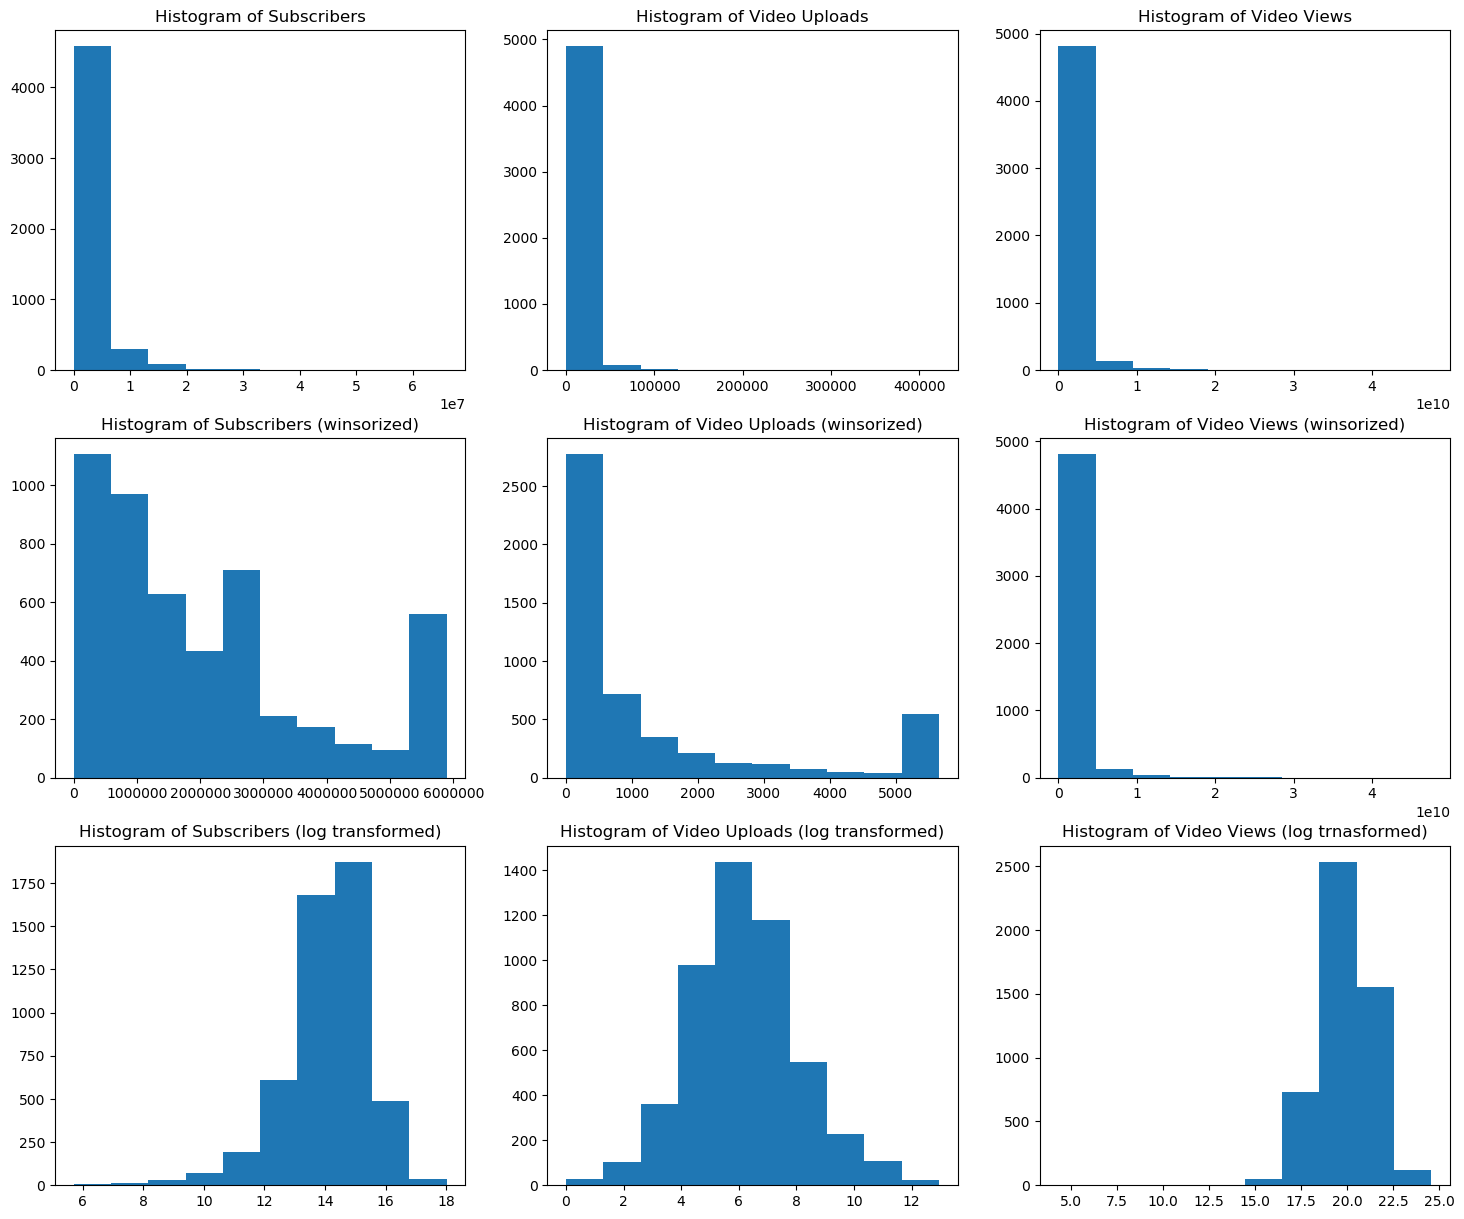

In [7]:
plt.style.use('default')
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3,3,1)
plt.hist(youtube_df["Subscribers"])
plt.title("Histogram of Subscribers")

plt.subplot(3,3,2)
plt.hist(youtube_df["Video Uploads"])
plt.title("Histogram of Video Uploads")

plt.subplot(3,3,3)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of Video Views")

# Histograms of the Winsorized data
plt.subplot(3,3,4)
plt.hist(youtube_df["winsorized_subscribers"])
plt.title("Histogram of Subscribers (winsorized)")

plt.subplot(3,3,5)
plt.hist(youtube_df["winsorized_uploads"])
plt.title("Histogram of Video Uploads (winsorized)")

plt.subplot(3,3,6)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of Video Views (winsorized)")

# Histograms of the Log transformed data
plt.subplot(3,3,7)
plt.hist(np.log(youtube_df["Subscribers"]))
plt.title("Histogram of Subscribers (log transformed)")

plt.subplot(3,3,8)
plt.hist(np.log(youtube_df["Video Uploads"]))
plt.title("Histogram of Video Uploads (log transformed)")


plt.subplot(3,3,9)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of Video Views (log trnasformed)")

plt.show();

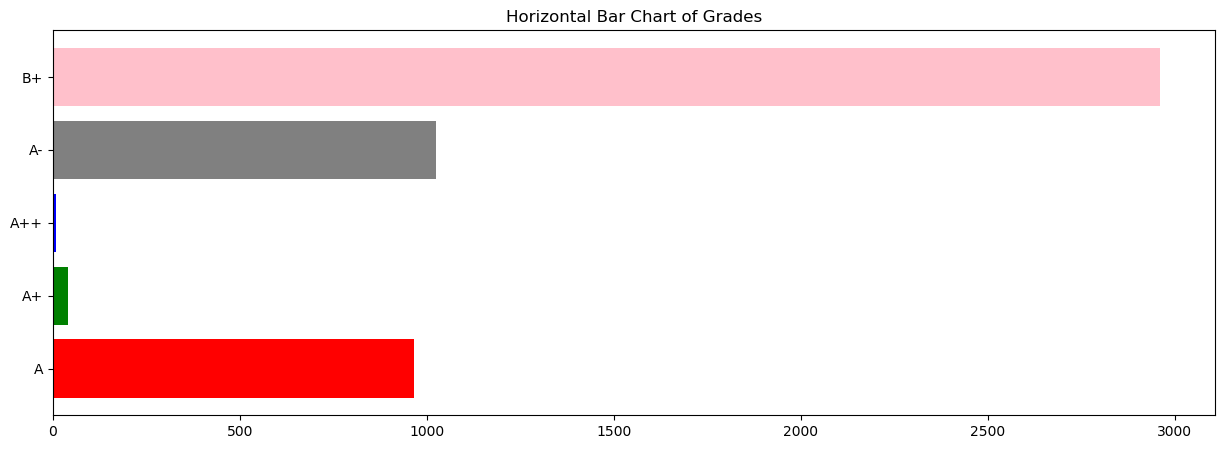

In [8]:
# Visualizing categorical data
# Bar Chart of Grades
plt.figure(figsize=(15,5))

plt.barh(
    youtube_df.groupby("Grade")["Grade"].count().index, 
    youtube_df.groupby("Grade")["Grade"].count(), 
    color=["red", "green", "blue", "grey", "pink"]
)
plt.title("Horizontal Bar Chart of Grades")

plt.show();

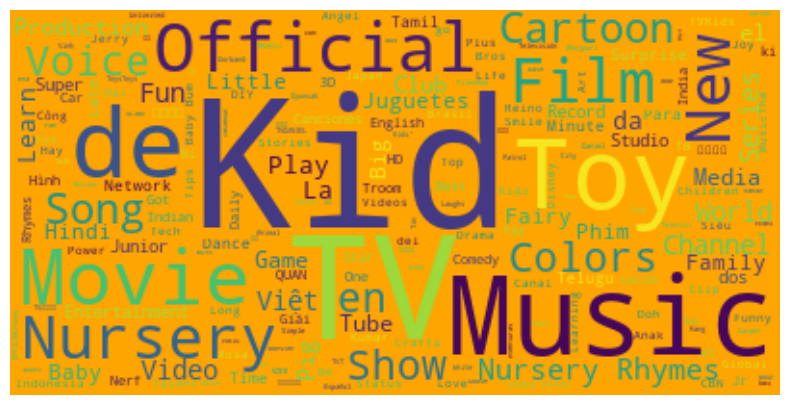

In [9]:
# Generate a Word Coud image
wordcloud = WordCloud(background_color="orange").generate("".join(youtube_df["Channel name"]))
plt.figure(figsize=(15,5))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show();

# Assignment

In [10]:
kagle = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="useducation"
)

engine = create_engine(URL(**kagle), echo=True)
usedu_df = pd.read_sql_query("SELECT * FROM useducation", con=engine)
engine.dispose()

2019-11-20 14:30:20,751 INFO sqlalchemy.engine.base.Engine select version()
2019-11-20 14:30:20,754 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:30:20,856 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-20 14:30:20,858 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:30:20,961 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-20 14:30:20,962 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:30:21,013 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-20 14:30:21,016 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:30:21,068 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-20 14:30:21,069 INFO sqlalchemy.engine.base.Engine {}
2019-11-20 14:30:21,168 INFO sqlalchemy.engine.base.Engine SELECT * FROM useducation
2019-11-20 14:30:21,169 INFO sqlalchemy.engine.base.Engine {}


In [11]:
# Change the "STATE" & "YEAR" variables to the category datatype
usedu_df["STATE"] = usedu_df["STATE"].astype("category")
usedu_df["YEAR"] = pd.to_datetime(usedu_df["YEAR"], format="%Y")
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null category
YEAR                            1492 non-null datetime64[ns]
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G            

Number of null values:  1079


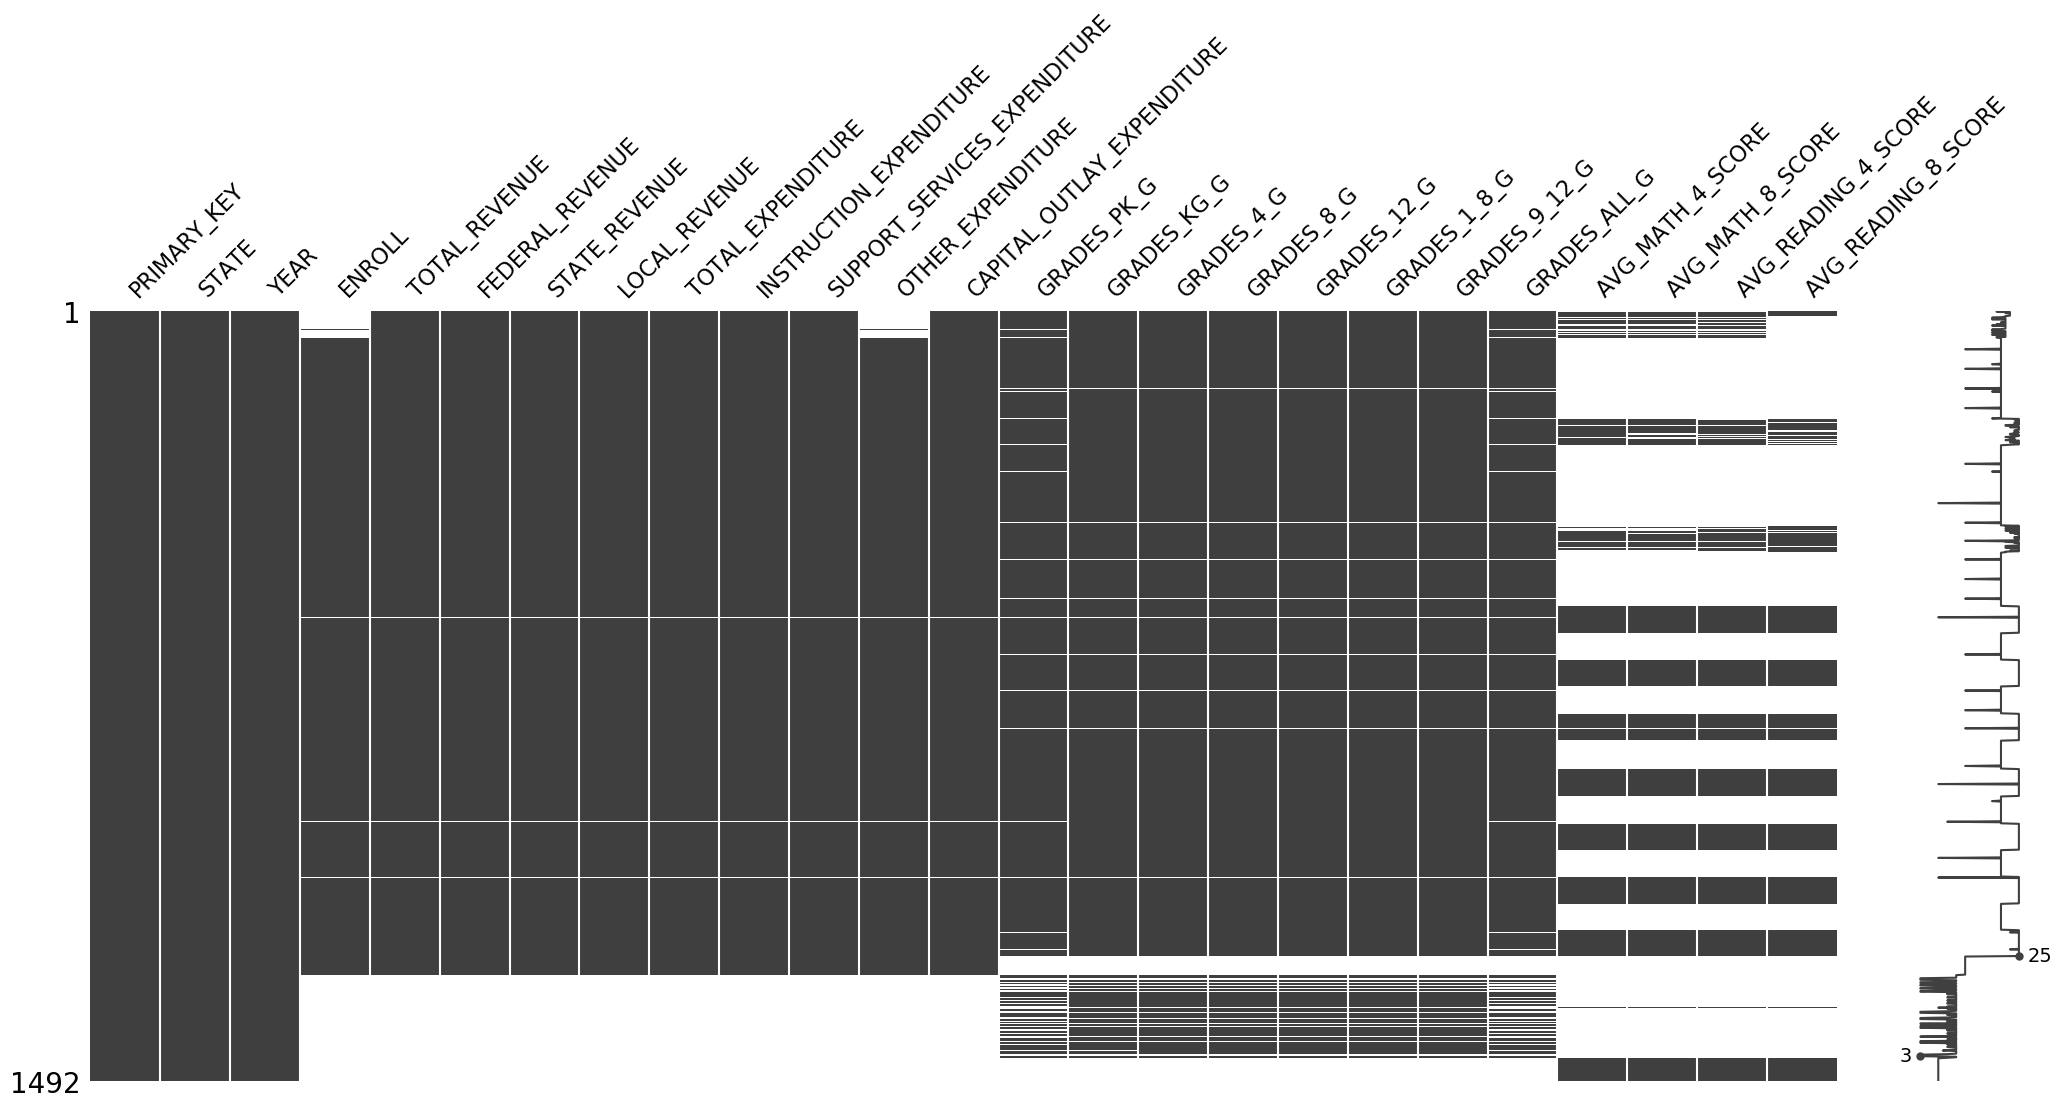

In [13]:
# Generate a count of entries with null values
def report_null_entries(df):
    if len(df[df.isnull().any(axis=1)] != 0):
        print("Number of null values: ", len(df[df.isnull().any(axis=1)]))
        # display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()
    else:
        print("No rows with null values found")

report_null_entries(usedu_df)

In [14]:
usedu_df.nunique()

PRIMARY_KEY                     1487
STATE                             80
YEAR                              26
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1261
GRADES_KG_G                     1348
GRADES_4_G                      1340
GRADES_8_G                      1347
GRADES_12_G                     1342
GRADES_1_8_G                    1360
GRADES_9_12_G                   1358
GRADES_ALL_G                    1318
AVG_MATH_4_SCORE                 535
AVG_MATH_8_SCORE                 531
AVG_READING_4_SCORE              532
AVG_READING_8_SCORE              497
dtype: int64

In [15]:
# The "PRIMARY_KEY" stayed an object column while "STATE" & "YEAR" are the categorical columns
categorical_cols = usedu_df.select_dtypes(include='category').columns
continuous_cols = usedu_df.select_dtypes(exclude=['object','category','datetime64[ns]']).columns

# Create a rowcount variable
df_len = len(usedu_df)

# Calculated the width of the longest column
max_col = len(max(usedu_df.columns, key=len))

In [16]:
for col in categorical_cols:
    vals = sorted(str(usedu_df[col].unique()), key=len)
    print(f"first five shortest strings in '{col}': {vals[:5]} \n")    

# Look at null value information for continuous variables
for col in categorical_cols:
    empty_strings = len(usedu_df.loc[usedu_df[col]==''])
    nulls = usedu_df[col].isna().sum()
    tot_nulls = empty_strings + nulls
    pct_nan = tot_nulls*100/df_len
    print(f"{col:<{max_col}}: {tot_nulls:>{5}} nulls | percent null: {pct_nan:>{5}.2f}")

first five shortest strings in 'STATE': ['[', 'A', 'L', 'A', 'B'] 

STATE                       :     0 nulls | percent null:  0.00


In [17]:
# Look a null value information for continuous variables
for col in continuous_cols:
    nulls = usedu_df[col].isnull().sum()
    pct_null = nulls*100/df_len
    print(f"{col:<{max_col}}: {nulls:>{5}} nulls | percent null: {pct_null:>{5}.2f}")

ENROLL                      :   263 nulls | percent null: 17.63
TOTAL_REVENUE               :   212 nulls | percent null: 14.21
FEDERAL_REVENUE             :   212 nulls | percent null: 14.21
STATE_REVENUE               :   212 nulls | percent null: 14.21
LOCAL_REVENUE               :   212 nulls | percent null: 14.21
TOTAL_EXPENDITURE           :   212 nulls | percent null: 14.21
INSTRUCTION_EXPENDITURE     :   212 nulls | percent null: 14.21
SUPPORT_SERVICES_EXPENDITURE:   212 nulls | percent null: 14.21
OTHER_EXPENDITURE           :   263 nulls | percent null: 17.63
CAPITAL_OUTLAY_EXPENDITURE  :   212 nulls | percent null: 14.21
GRADES_PK_G                 :   173 nulls | percent null: 11.60
GRADES_KG_G                 :   132 nulls | percent null:  8.85
GRADES_4_G                  :   131 nulls | percent null:  8.78
GRADES_8_G                  :   131 nulls | percent null:  8.78
GRADES_12_G                 :   131 nulls | percent null:  8.78
GRADES_1_8_G                :   131 null

In [18]:
# I'll be looking to replace null values in the continuous variable columns using several methods
null_replace_cols = list(continuous_cols)

In [19]:
# Fill in null values in the continuous colums using mean values
mean_replacement = usedu_df.copy()
for col in null_replace_cols:
    try:
        mean_replacement[col].fillna(mean_replacement[col].mean(), inplace=True)
    except:
        print("No values could be replaced.")

mean_replacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null category
YEAR                            1492 non-null datetime64[ns]
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G            

In [20]:
# Fill in null values in the continuous colums using median values
median_replacement = usedu_df.copy()
for col in null_replace_cols:
    try:
        median_replacement[col].fillna(median_replacement[col].median(), inplace=True)
    except:
        print("No values could be replaced.")

median_replacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null category
YEAR                            1492 non-null datetime64[ns]
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G            

In [25]:
# Fill in null values in the continuous colums using interpolation
interpolation_replacement = usedu_df.copy()

states = interpolation_replacement["STATE"].unique()

for state in states:
    interpolation_replacement.loc[interpolation_replacement["STATE"] == state, null_replace_cols]=interpolation_replacement.loc[interpolation_replacement["STATE"] == state, null_replace_cols].interpolate()

interpolation_replacement.dropna(inplace=True)

## _I do not like the above solution as it discards data and it reduces the number of data points.  Why can't I fill the first row null and interpolate from there?_  Discuss with Abhimanyu 20191120

In [14]:
interpolation_replacement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1046 non-null object
STATE                           1046 non-null category
YEAR                            1046 non-null datetime64[ns]
ENROLL                          1046 non-null float64
TOTAL_REVENUE                   1046 non-null float64
FEDERAL_REVENUE                 1046 non-null float64
STATE_REVENUE                   1046 non-null float64
LOCAL_REVENUE                   1046 non-null float64
TOTAL_EXPENDITURE               1046 non-null float64
INSTRUCTION_EXPENDITURE         1046 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1046 non-null float64
OTHER_EXPENDITURE               1046 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1046 non-null float64
GRADES_PK_G                     1046 non-null float64
GRADES_KG_G                     1046 non-null float64
GRADES_4_G                      1046 non-null float64
GRADES_8_G           

In [15]:
# Winsorize the data and look at the descriptive statistics
winsorized_means = mean_replacement.copy()

for col in winsorized_means.columns:
    # Winsorized values taken from 17.4
    winsorized_means[col] = _ = winsorize(winsorized_means[col], (0,0.105))

### _1. Derive the descriptive statistics of the data and discuss the points you find remarkable._

In [16]:
# Take a look at the raw means and see if there are any 
desc = usedu_df.describe()
desc = desc.iloc[:,1:]
desc.loc["count"] = desc.loc["count"].astype(int).astype(str)
desc.iloc[1:] = desc.iloc[1:].applymap("{:,.4f}".format)
print_df = pd.DataFrame(desc)
print("Unwinsorized dataframe")
print_df

Unwinsorized dataframe


,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1280,1280,1280,1280,1280,1280,1280,1229,1280,1319,...,1361,1361,1361,1361,1361,1319,536,532,533,498
mean,"9,092,081.8586","766,372.3359","4,216,552.9477","4,109,156.5688","9,196,680.8688","4,762,966.3742","2,680,330.6758","429,204.6168","902,769.2945","17,601.6141",...,"64,538.9273","64,271.0573","54,268.9243","519,214.0360","247,071.3519","802,441.5125",234.7683,278.4147,218.8662,263.6611
std,"11,745,187.3975","1,145,241.5879","5,543,071.9956","5,482,970.6079","11,978,126.8957","6,293,003.7250","3,353,348.5591","534,069.3187","1,327,561.8152","30,016.1664",...,"80,293.3876","78,910.5458","67,889.2762","643,638.4262","307,705.6291","970,703.0750",10.2215,10.1597,7.7696,6.8037
min,"465,650.0000","31,020.0000",0.0000,"22,093.0000","481,665.0000","265,549.0000","139,963.0000","11,541.0000","12,708.0000",0.0000,...,633.0000,437.0000,311.0000,"4,878.0000","1,808.0000","7,254.0000",187.1347,232.8315,178.5576,236.3791
25%,"2,186,305.2500","189,354.0000","1,153,097.2500","715,834.5000","2,165,404.5000","1,168,032.0000","635,790.0000","102,831.0000","181,564.5000","2,021.0000",...,"13,739.0000","13,342.0000","10,919.0000","110,626.0000","51,471.0000","181,065.0000",229.6944,272.7616,214.6634,259.5332
50%,"5,079,546.0000","403,376.5000","2,537,073.5000","2,055,780.5000","5,234,505.5000","2,657,452.0000","1,525,405.5000","271,596.0000","510,259.5000","8,106.0000",...,"43,272.0000","43,339.0000","36,735.0000","345,775.0000","164,260.0000","550,342.0000",237.2386,280.6188,220.4160,265.0109
75%,"10,859,847.7500","828,966.0000","5,080,939.2500","4,768,680.0000","10,745,191.0000","5,568,028.0000","3,229,650.7500","518,600.0000","966,851.5000","22,295.0000",...,"75,481.0000","76,566.0000","67,460.0000","611,905.0000","290,502.0000","928,275.5000",241.9955,285.3474,223.9993,268.1901
max,"89,217,262.0000","9,990,221.0000","50,904,567.0000","36,105,265.0000","85,320,133.0000","43,964,520.0000","26,058,021.0000","3,995,951.0000","10,223,657.0000","250,911.0000",...,"493,415.0000","500,143.0000","498,403.0000","3,929,869.0000","2,013,687.0000","5,944,746.0000",253.4210,300.5682,236.7739,280.4991


In [17]:
# Take a look at the winsorized means and see if there are any 
desc = winsorized_means.describe()
desc = desc.iloc[:,1:]
desc.loc["count"] = desc.loc["count"].astype(int).astype(str)
desc.iloc[1:] = desc.iloc[1:].applymap("{:,.4f}".format)
print_df = pd.DataFrame(desc)
print("Winsorized dataframe")
print_df

Winsorized dataframe


,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,...,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492
mean,"7,441,528.0463","597,049.8882","3,485,961.9376","3,316,696.9910","7,516,272.0283","3,850,226.1148","2,240,511.5250","360,766.8614","707,676.3662","13,229.1530",...,"53,413.3529","53,801.5426","45,615.3479","430,320.0709","206,324.7581","672,225.8530",234.3947,277.9579,218.5427,263.3545
std,"5,567,053.7622","432,546.1856","2,484,717.9132","2,749,980.0375","5,648,292.2117","2,849,749.4269","1,712,552.1088","251,560.0647","540,288.4794","11,594.4361",...,"40,600.0968","41,418.8635","35,381.5783","327,798.6042","160,317.7068","488,164.1655",5.5092,5.2912,4.0781,3.3792
min,"465,650.0000","31,020.0000",0.0000,"22,093.0000","481,665.0000","265,549.0000","139,963.0000","11,541.0000","12,708.0000",0.0000,...,633.0000,437.0000,311.0000,"4,878.0000","1,808.0000","7,254.0000",187.1347,232.8315,178.5576,236.3791
25%,"2,546,260.7500","217,020.0000","1,356,434.0000","944,796.2500","2,523,968.5000","1,343,611.2500","767,368.7500","135,428.2500","216,339.7500","2,449.0000",...,"15,195.5000","15,682.7500","13,437.0000","121,152.2500","59,197.5000","229,357.7500",234.7683,278.4147,218.8662,263.6611
50%,"6,359,310.5000","516,741.0000","3,127,639.0000","2,697,257.0000","6,520,223.5000","3,358,141.5000","1,913,843.5000","367,233.5000","648,217.5000","10,505.0000",...,"49,884.5000","49,571.0000","39,566.0000","401,586.5000","181,701.0000","647,326.0000",234.7683,278.4147,218.8662,263.6611
75%,"9,276,958.0000","766,372.3359","4,269,811.0000","4,109,156.5688","9,434,922.0000","4,938,819.7500","2,795,887.5000","456,891.5000","902,769.2945","19,149.2500",...,"71,814.2500","72,131.0000","64,616.2500","574,911.7500","282,539.0000","872,422.0000",234.7683,278.4147,218.8662,263.6611
max,"18,622,316.0000","1,456,330.0000","8,357,924.0000","8,903,891.0000","19,025,136.0000","9,507,096.0000","5,778,548.0000","852,220.0000","1,797,341.0000","35,128.0000",...,"131,575.0000","135,598.0000","115,962.0000","1,063,552.0000","525,196.0000","1,624,706.0000",241.2355,284.2591,223.4864,267.4900


The Winsorized data is more complete than the raw dataframe.  The Winsorized data achieves this by filling in missing data and providing more data for analysis.  

### _2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates._

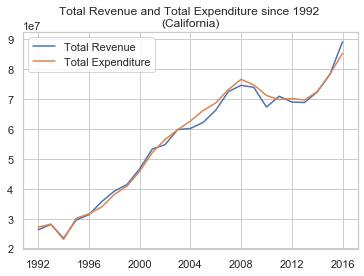

In [18]:
plt.plot(usedu_df.loc[usedu_df["STATE"]=="CALIFORNIA","YEAR"], 
    usedu_df.loc[usedu_df["STATE"]=="CALIFORNIA","TOTAL_REVENUE"], label="Total Revenue")

plt.plot(usedu_df.loc[usedu_df["STATE"]=="CALIFORNIA","YEAR"], 
    usedu_df.loc[usedu_df["STATE"]=="CALIFORNIA", "TOTAL_EXPENDITURE"], label="Total Expenditure")
plt.title(f"Total Revenue and Total Expenditure since 1992 \n(California)")
plt.legend()

plt.show();

The Great Recession started in December 2007 and lasted until June 2007.  The fall-off in both revenue and expenditures coincide roughly with this timeframe.  Total Revenue and Total Expeditures are both lagging indicators for economic growth.  Once overall economic health inproves these two indicators can begin to grow.

### _3. In your chosen state, which of the lessons are the students more successful, math or reading?_

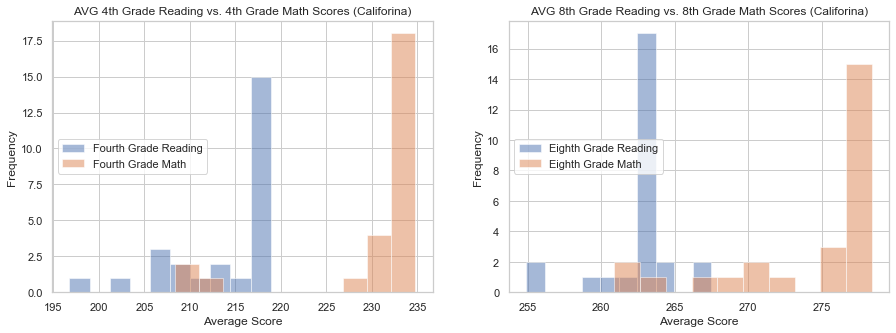


Average 4th Grade Reading Score: 214.23
Average 4th Grade Math Score:    230.91

Average 8th Grade Reading Score: 262.89
Average 8th Grade Math Score:    274.58



In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

fourth_reading = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_READING_4_SCORE"]

fourth_math = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_MATH_4_SCORE"]

plt.hist(fourth_reading, alpha=0.5, label="Fourth Grade Reading")
plt.hist(fourth_math, alpha=0.5, label="Fourth Grade Math")
plt.legend(loc="center left")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.title("AVG 4th Grade Reading vs. 4th Grade Math Scores (Califorina)")

plt.subplot(1,2,2)

eighth_reading = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_READING_8_SCORE"]

eighth_math = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_MATH_8_SCORE"]

plt.hist(eighth_reading, alpha=0.5, label="Eighth Grade Reading")
plt.hist(eighth_math, alpha=0.5, label="Eighth Grade Math")
plt.legend(loc="center left")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.title("AVG 8th Grade Reading vs. 8th Grade Math Scores (Califorina)")

plt.show();

avg_fourth_reading = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_READING_4_SCORE"].mean()

avg_fourth_math = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_MATH_4_SCORE"].mean()

avg_eighth_reading = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_READING_8_SCORE"].mean()

avg_eighth_math = winsorized_means.loc[winsorized_means["STATE"] == "CALIFORNIA", "AVG_MATH_8_SCORE"].mean()

print(f"""
Average 4th Grade Reading Score: {avg_fourth_reading:,.2f}
Average 4th Grade Math Score:    {avg_fourth_math:,.2f}

Average 8th Grade Reading Score: {avg_eighth_reading:,.2f}
Average 8th Grade Math Score:    {avg_eighth_math:,.2f}
""")

In the Fourth Grade, Califorina students present at more proficient in Math than reading.  By the Eighth Grade Average Reading scores overtake Average Math scores.

### _4. What are the distributions of the math and reading scores in the sample?_

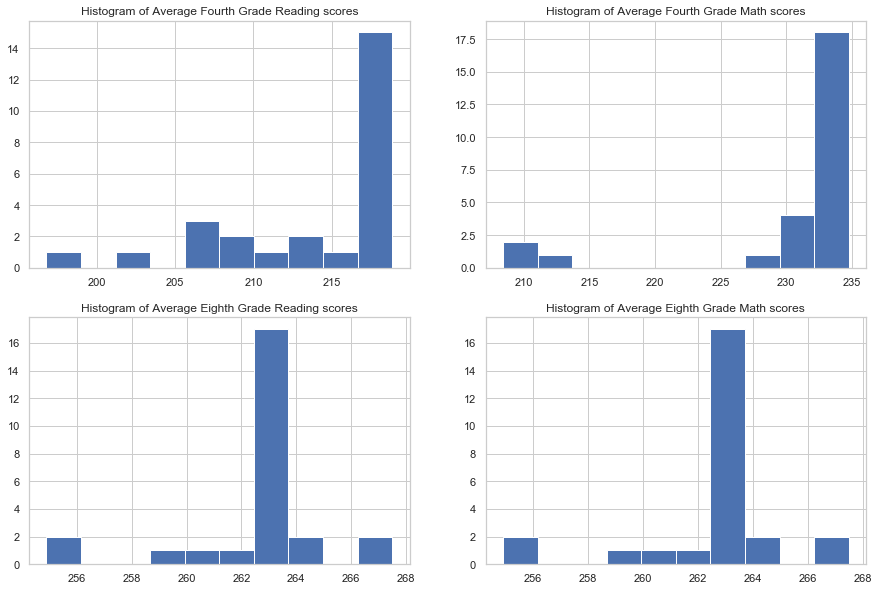

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(fourth_reading)
plt.title("Histogram of Average Fourth Grade Reading scores")

plt.subplot(2,2,2)
plt.hist(fourth_math)
plt.title("Histogram of Average Fourth Grade Math scores")

plt.subplot(2,2,3)
plt.hist(eighth_reading)
plt.title("Histogram of Average Eighth Grade Reading scores")

plt.subplot(2,2,4)
plt.hist(eighth_reading)
plt.title("Histogram of Average Eighth Grade Math scores")

plt.show();

### _5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables._

In [43]:
mean_replacement_max = mean_replacement.max()

mean_replacement_max

PRIMARY_KEY                            2017_WYOMING
STATE                                       WYOMING
YEAR                            2017-01-01 00:00:00
ENROLL                                  6.30702e+06
TOTAL_REVENUE                           8.92173e+07
FEDERAL_REVENUE                         9.99022e+06
STATE_REVENUE                           5.09046e+07
LOCAL_REVENUE                           3.61053e+07
TOTAL_EXPENDITURE                       8.53201e+07
INSTRUCTION_EXPENDITURE                 4.39645e+07
SUPPORT_SERVICES_EXPENDITURE             2.6058e+07
OTHER_EXPENDITURE                       3.99595e+06
CAPITAL_OUTLAY_EXPENDITURE              1.02237e+07
GRADES_PK_G                                  250911
GRADES_KG_G                                  530531
GRADES_4_G                                   493415
GRADES_8_G                                   500143
GRADES_12_G                                  498403
GRADES_1_8_G                            3.92987e+06
GRADES_9_12_

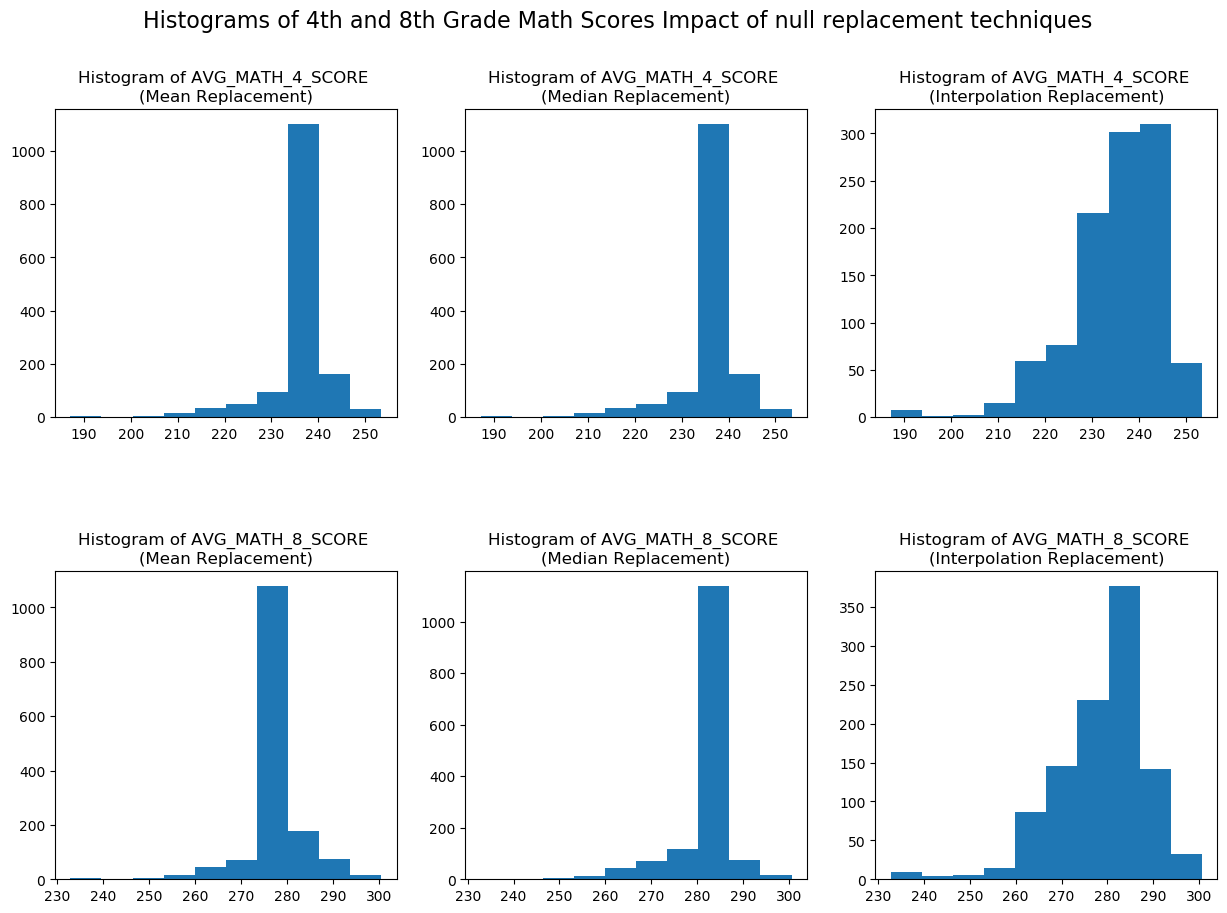

In [45]:
plt.figure(figsize=(15,10))
plt.suptitle(f"Histograms of 4th and 8th Grade Math Scores Impact of null replacement techniques", fontsize=16)

plt.subplot(2,3,1)
plt.hist(mean_replacement["AVG_MATH_4_SCORE"])
plt.title(f"Histogram of AVG_MATH_4_SCORE \n(Mean Replacement)")

plt.subplot(2,3,2)
plt.hist(median_replacement["AVG_MATH_4_SCORE"])
plt.title(f"Histogram of AVG_MATH_4_SCORE \n(Median Replacement)")

plt.subplot(2,3,3)
plt.hist(interpolation_replacement["AVG_MATH_4_SCORE"])
plt.title("Histogram of AVG_MATH_4_SCORE \n(Interpolation Replacement)")

plt.subplot(2,3,4)
plt.hist(mean_replacement["AVG_MATH_8_SCORE"])
plt.title(f"Histogram of AVG_MATH_8_SCORE \n(Mean Replacement)")

plt.subplot(2,3,5)
plt.hist(median_replacement["AVG_MATH_8_SCORE"])
plt.title(f"Histogram of AVG_MATH_8_SCORE \n(Median Replacement)")

plt.subplot(2,3,6)
plt.hist(interpolation_replacement["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG_MATH_8_SCORE \n(Interpolation Replacement)")

plt.subplots_adjust(hspace=0.5)

plt.show();

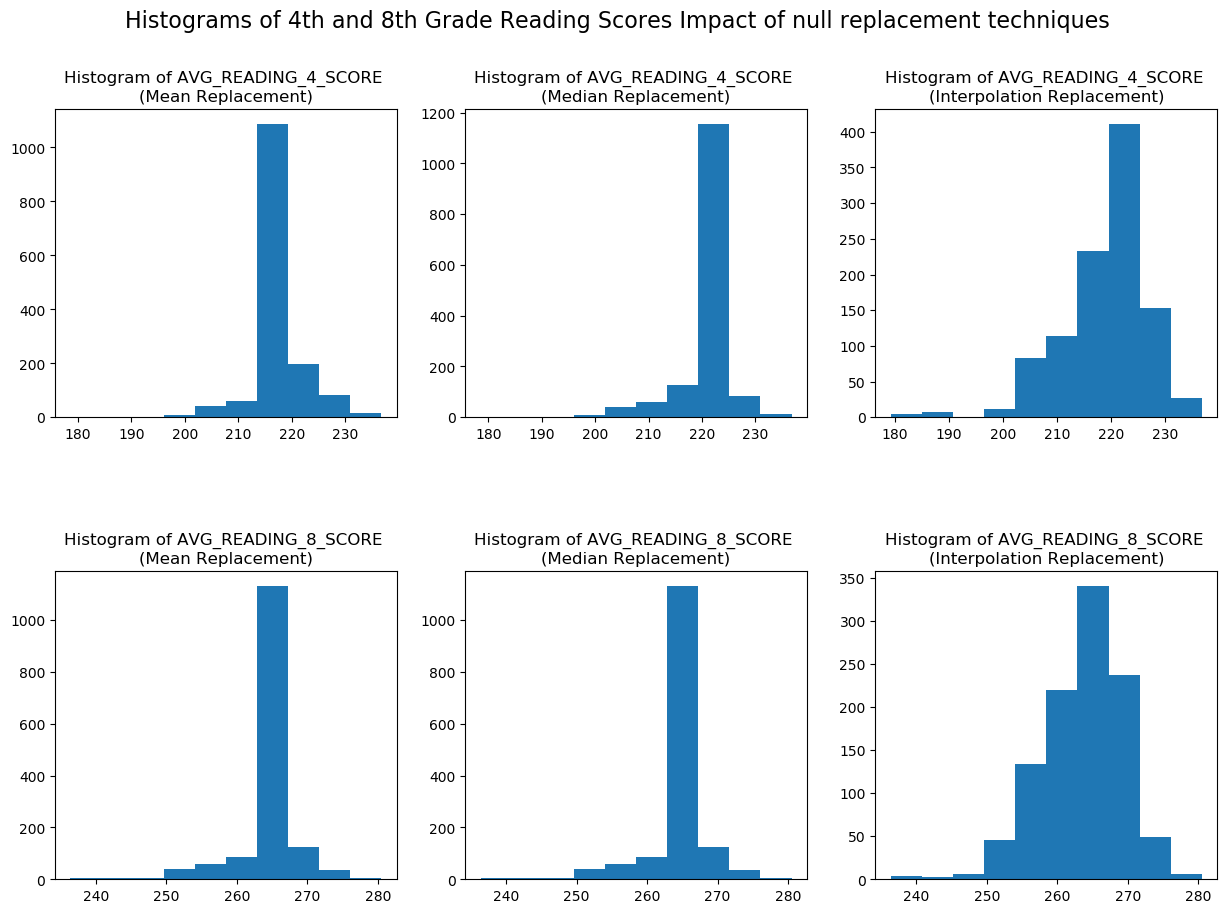

In [44]:
plt.figure(figsize=(15,10))
plt.suptitle(f"Histograms of 4th and 8th Grade Reading Scores Impact of null replacement techniques", fontsize=16, **dict(linespacing=1.5))

plt.subplot(2,3,1)
plt.hist(mean_replacement["AVG_READING_4_SCORE"])
plt.title(f"Histogram of AVG_READING_4_SCORE \n(Mean Replacement)")

plt.subplot(2,3,2)
plt.hist(median_replacement["AVG_READING_4_SCORE"])
plt.title(f"Histogram of AVG_READING_4_SCORE \n(Median Replacement)")

plt.subplot(2,3,3)
plt.hist(interpolation_replacement["AVG_READING_4_SCORE"])
plt.title("Histogram of AVG_READING_4_SCORE \n(Interpolation Replacement)")

plt.subplot(2,3,4)
plt.hist(mean_replacement["AVG_READING_8_SCORE"])
plt.title(f"Histogram of AVG_READING_8_SCORE \n(Mean Replacement)")

plt.subplot(2,3,5)
plt.hist(median_replacement["AVG_READING_8_SCORE"])
plt.title(f"Histogram of AVG_READING_8_SCORE \n(Median Replacement)")

plt.subplot(2,3,6)
plt.hist(interpolation_replacement["AVG_READING_8_SCORE"])
plt.title("Histogram of AVG_READING_8_SCORE \n(Interpolation Replacement)")

plt.subplots_adjust(hspace=0.5)

plt.show();